Project: Seasoal analysis
 
Analysis to Perfrom
1. Highest temprature of the year 2018
2. Lowest temprature of the year 2018
3. Mean temprature of the year 2018
4. Coolest day of the year
4. Hottest day of the year

In [166]:
import pandas as pd
import datetime
df = pd.read_csv('data/temp-data.csv')

In [167]:
df.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [168]:
df.tail()

,id,room_id/id,noted_date,temp,out/in
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In
97602,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In
97603,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In
97604,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In
97605,__export__.temp_log_133741_32958703,Room Admin,28-07-2018 07:06,31,In


In [169]:
df.describe(include='all')

,id,room_id/id,noted_date,temp,out/in
count,97606,97606,97606,97606.000000,97606
unique,97605,1,27920,NaN,2
top,__export__.temp_log_196108_4a983c7e,Room Admin,12-09-2018 03:09,NaN,Out
freq,2,97606,65,NaN,77261
mean,NaN,NaN,NaN,35.053931,NaN
std,NaN,NaN,NaN,5.699825,NaN
min,NaN,NaN,NaN,21.000000,NaN
25%,NaN,NaN,NaN,30.000000,NaN
50%,NaN,NaN,NaN,35.000000,NaN
75%,NaN,NaN,NaN,40.000000,NaN


In [170]:
#seperating date and time
date = df["noted_date"].str.split(' ', n=1, expand=True)
df["date"] = date[0]
df["time"] = date[1]

In [171]:
#extracting months from date
month = df["date"].str.split('-', n=2, expand=True)
df["month"] = month[1]

In [172]:
#deducing season based on the month
d = dict({1: 'Winter', 2: 'Spring', 3: 'Spring', 4: 'Summer', 5: 'Summer', 6: 'Summer', 7: 'Monsoon', 8: 'Monsoon', 9: 'Monsoon', 10: 'Autumn', 11: 'Autumn', 12: 'Winter' })
df["season"] = df.apply(lambda row: d[int(row["month"])], axis = 1 )

In [173]:
#deducing day_time from time
def getTime(time):
  local_time = int(time.split(':')[0])

  if (local_time>=6 and local_time<=18):
    return 'Day'
  else:
    return 'Night'

df["day_time"] = df.apply(lambda row: getTime(row["time"]), axis=1)

Highest temprature of the year

In [174]:
print(f"Highest temp: {df['temp'].max()}")

Highest temp: 51


Lowest temprature of the year

In [175]:
print(f"Lowest temp: {df['temp'].min()}")

Lowest temp: 21


Average temprature of the year

In [176]:
print(f"Mean temp: {df['temp'].mean()}")

Mean temp: 35.05393111079237


Coolest day of the year 2018

In [177]:
df.loc[df['temp'] == df['temp'].min()]

,id,room_id/id,noted_date,temp,out/in,date,time,month,season,day_time
5759,__export__.temp_log_177075_1afebd80,Room Admin,03-12-2018 11:02,21,In,03-12-2018,11:02,12,Winter,Day
5760,__export__.temp_log_177074_72ce2c39,Room Admin,03-12-2018 11:02,21,In,03-12-2018,11:02,12,Winter,Day


Hottest day of the year 2018

In [178]:
df.loc[df['temp'] == df['temp'].max()]

,id,room_id/id,noted_date,temp,out/in,date,time,month,season,day_time
52557,__export__.temp_log_36405_139a524d,Room Admin,30-09-2018 17:29,51,Out,30-09-2018,17:29,09,Monsoon,Day
52563,__export__.temp_log_36382_f6ec793e,Room Admin,30-09-2018 17:13,51,Out,30-09-2018,17:13,09,Monsoon,Day


In [179]:
df.groupby(['season', 'day_time','out/in'])[['temp']].describe(include='all')

temp                                               \
                           count       mean       std   min   25%   50%   75%   
season  day_time out/in                                                         
Autumn  Day      In       2313.0  30.926070  1.910447  22.0  30.0  31.0  32.0   
                 Out     21941.0  41.111845  2.549309  34.0  39.0  40.0  42.0   
        Night    In       1395.0  31.678136  1.981348  25.0  30.0  32.0  33.0   
                 Out     19210.0  38.573035  2.475304  31.0  37.0  38.0  39.0   
Monsoon Day      In      10415.0  30.866443  2.170591  24.0  29.0  31.0  32.0   
                 Out     18636.0  31.774308  4.885206  24.0  29.0  31.0  32.0   
        Night    In       3754.0  29.912893  2.024136  25.0  28.0  29.5  32.0   
                 Out     12330.0  30.389700  5.424823  25.0  28.0  28.0  30.0   
Winter  Day      In       1400.0  28.399286  1.817986  21.0  27.0  29.0  30.0   
                 Out      2533.0  38.973154  2.230424  25.0  38.0  39.0  41.0   
        Night    In       1068.0  28.404494  1.692161  24.0  27.0  29.0  30.0   
                 Out      2611.0  35.731903  1.548492  30.0  35.0  36.0  37.0   

                               
                          max  
season  day_time out/in        
Autumn  Day      In      35.0  
                 Out     50.0  
        Night    In      36.0  
                 Out     49.0  
Monsoon Day      In      41.0  
                 Out     51.0  
        Night    In      35.0  
                 Out     50.0  
Winter  Day      In      31.0  
                 Out     43.0  
        Night    In      31.0  
                 Out     40.0

In [180]:
def parse_date(date):
    return datetime.datetime.strptime(date, '%d-%m-%Y %H:%M')

df['updated_date'] = df.apply(lambda row: parse_date(row["noted_date"]), axis=1)

In [181]:
df

,id,room_id/id,noted_date,temp,out/in,date,time,month,season,day_time,updated_date
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In,08-12-2018,09:30,12,Winter,Day,2018-12-08 09:30:00
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In,08-12-2018,09:30,12,Winter,Day,2018-12-08 09:30:00
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out,08-12-2018,09:29,12,Winter,Day,2018-12-08 09:29:00
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out,08-12-2018,09:29,12,Winter,Day,2018-12-08 09:29:00
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In,08-12-2018,09:29,12,Winter,Day,2018-12-08 09:29:00
...,...,...,...,...,...,...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In,28-07-2018,07:07,07,Monsoon,Day,2018-07-28 07:07:00
97602,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In,28-07-2018,07:07,07,Monsoon,Day,2018-07-28 07:07:00
97603,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In,28-07-2018,07:06,07,Monsoon,Day,2018-07-28 07:06:00
97604,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In,28-07-2018,07:06,07,Monsoon,Day,2018-07-28 07:06:00


<AxesSubplot:xlabel='updated_date'>

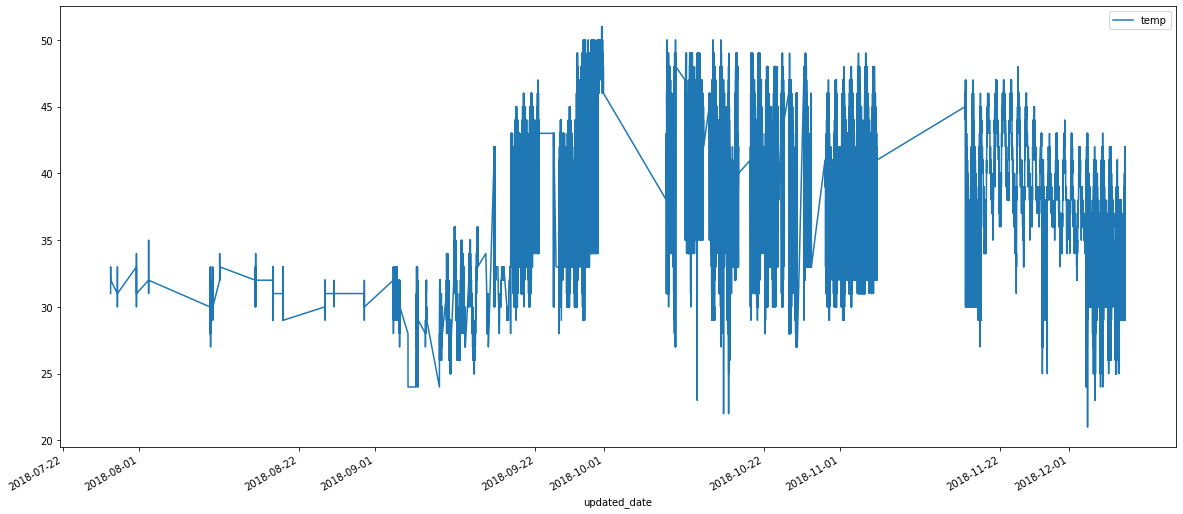

In [182]:
df.plot('updated_date', 'temp', figsize=(20,9), kind='line')

In [183]:
filtered_df = df.drop_duplicates(subset=['updated_date', 'temp', 'out/in'], keep=False)

In [184]:
filtered_df

,id,room_id/id,noted_date,temp,out/in,date,time,month,season,day_time,updated_date
38,__export__.temp_log_196039_a167c302,Room Admin,08-12-2018 09:05,29,In,08-12-2018,09:05,12,Winter,Day,2018-12-08 09:05:00
39,__export__.temp_log_196038_b58a003f,Room Admin,08-12-2018 09:04,42,Out,08-12-2018,09:04,12,Winter,Day,2018-12-08 09:04:00
40,__export__.temp_log_196037_fdf98314,Room Admin,08-12-2018 09:04,30,In,08-12-2018,09:04,12,Winter,Day,2018-12-08 09:04:00
41,__export__.temp_log_196035_689daecd,Room Admin,08-12-2018 09:04,29,In,08-12-2018,09:04,12,Winter,Day,2018-12-08 09:04:00
42,__export__.temp_log_196034_d592acf9,Room Admin,08-12-2018 09:03,42,Out,08-12-2018,09:03,12,Winter,Day,2018-12-08 09:03:00
...,...,...,...,...,...,...,...,...,...,...,...
97565,__export__.temp_log_114516_38f9fcc0,Room Admin,28-07-2018 07:15,32,Out,28-07-2018,07:15,07,Monsoon,Day,2018-07-28 07:15:00
97568,__export__.temp_log_87925_41f1e6d9,Room Admin,28-07-2018 07:10,31,In,28-07-2018,07:10,07,Monsoon,Day,2018-07-28 07:10:00
97569,__export__.temp_log_148010_12bbd064,Room Admin,28-07-2018 07:09,32,Out,28-07-2018,07:09,07,Monsoon,Day,2018-07-28 07:09:00
97570,__export__.temp_log_98383_615cf2dc,Room Admin,28-07-2018 07:09,33,Out,28-07-2018,07:09,07,Monsoon,Day,2018-07-28 07:09:00


<AxesSubplot:xlabel='updated_date'>

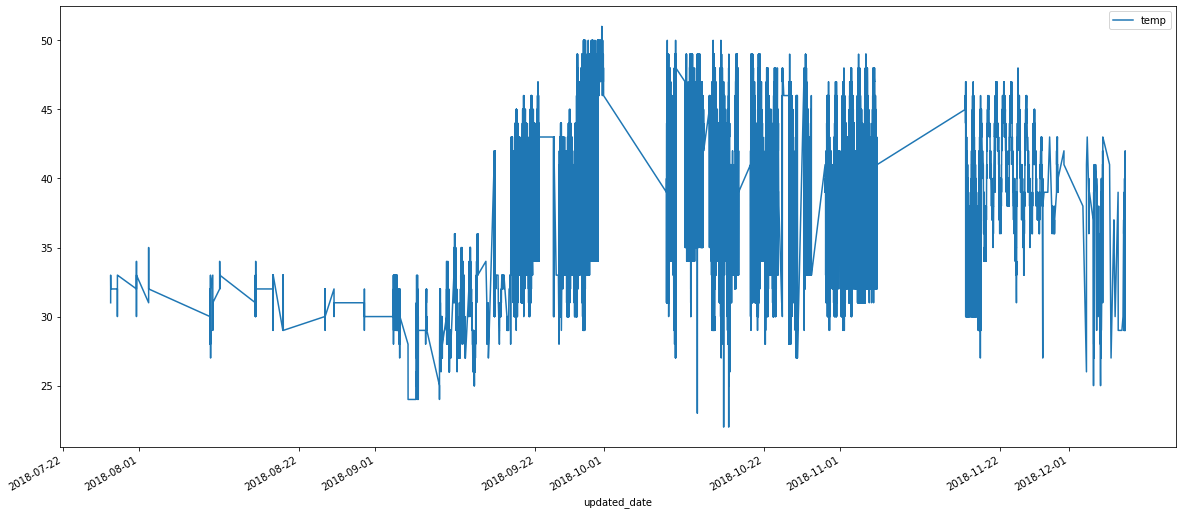

In [185]:
filtered_df.plot('updated_date', 'temp', figsize=(20,9), kind='line')

In [186]:
filtered_df.describe()

,temp
count,23075.000000
mean,38.068689
std,6.426103
min,22.000000
25%,32.000000
50%,39.000000
75%,44.000000
max,51.000000


In [200]:
winter_df = filtered_df.loc[df['season'] == 'Winter', ['season', 'temp', 'out/in', 'updated_date']]
winter_df

,season,temp,out/in,updated_date
38,Winter,29,In,2018-12-08 09:05:00
39,Winter,42,Out,2018-12-08 09:04:00
40,Winter,30,In,2018-12-08 09:04:00
41,Winter,29,In,2018-12-08 09:04:00
42,Winter,42,Out,2018-12-08 09:03:00
...,...,...,...,...
5855,Winter,26,In,2018-12-03 07:05:00
6202,Winter,38,Out,2018-12-02 19:55:00
6203,Winter,38,Out,2018-12-02 19:54:00
6206,Winter,38,Out,2018-12-02 19:51:00


In [201]:
autumn_df = filtered_df.loc[df['season'] == 'Autumn', ['season', 'temp', 'out/in', 'updated_date']]
autumn_df

,season,temp,out/in,updated_date
7970,Autumn,41,Out,2018-11-30 08:18:00
7971,Autumn,41,Out,2018-11-30 08:17:00
7972,Autumn,42,Out,2018-11-30 08:16:00
7973,Autumn,42,Out,2018-11-30 08:15:00
8534,Autumn,40,Out,2018-11-29 13:46:00
...,...,...,...,...
52309,Autumn,38,Out,2018-10-09 04:55:00
52326,Autumn,38,Out,2018-10-09 04:54:00
52393,Autumn,39,Out,2018-10-09 04:51:00
52412,Autumn,39,Out,2018-10-09 04:50:00


In [203]:
monsoon_df =  filtered_df.loc[df['season'] == 'Monsoon', ['season', 'temp', 'out/in', 'updated_date']]
monsoon_df

,season,temp,out/in,updated_date
52471,Monsoon,46,Out,2018-09-30 22:59:00
52472,Monsoon,46,Out,2018-09-30 22:57:00
52473,Monsoon,47,Out,2018-09-30 22:55:00
52474,Monsoon,48,Out,2018-09-30 22:51:00
52475,Monsoon,48,Out,2018-09-30 22:35:00
...,...,...,...,...
97565,Monsoon,32,Out,2018-07-28 07:15:00
97568,Monsoon,31,In,2018-07-28 07:10:00
97569,Monsoon,32,Out,2018-07-28 07:09:00
97570,Monsoon,33,Out,2018-07-28 07:09:00


<AxesSubplot:xlabel='updated_date'>

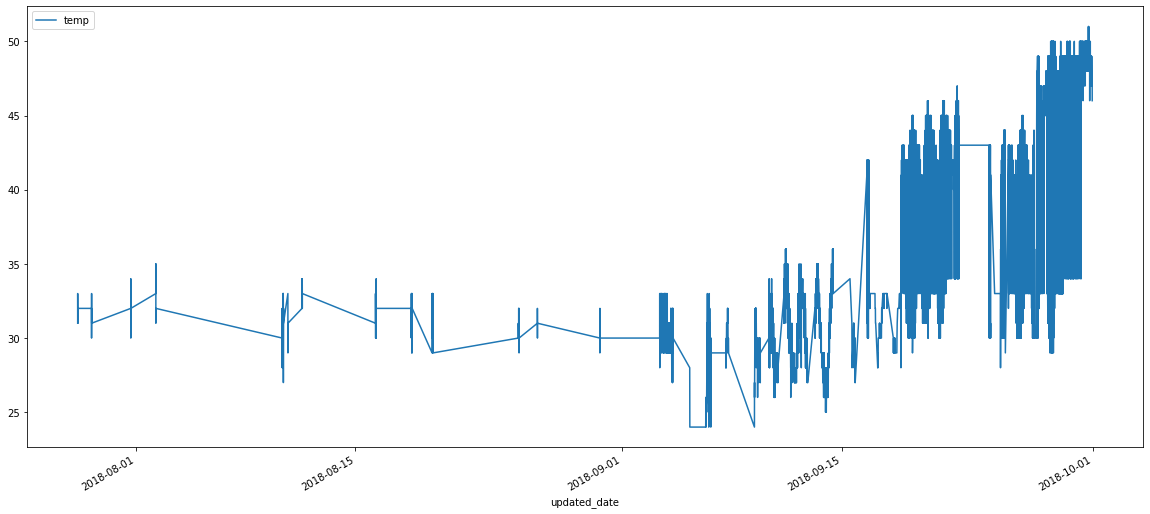

In [205]:
monsoon_df.plot('updated_date', 'temp', figsize=(20,9))

<AxesSubplot:xlabel='updated_date'>

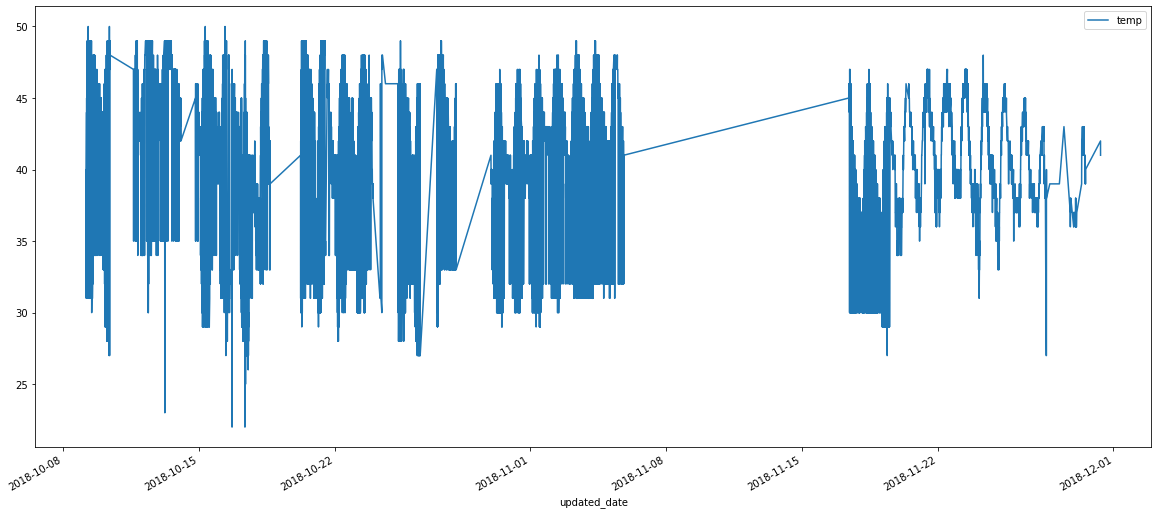

In [206]:
autumn_df.plot('updated_date', 'temp', figsize=(20,9))

<AxesSubplot:xlabel='updated_date'>

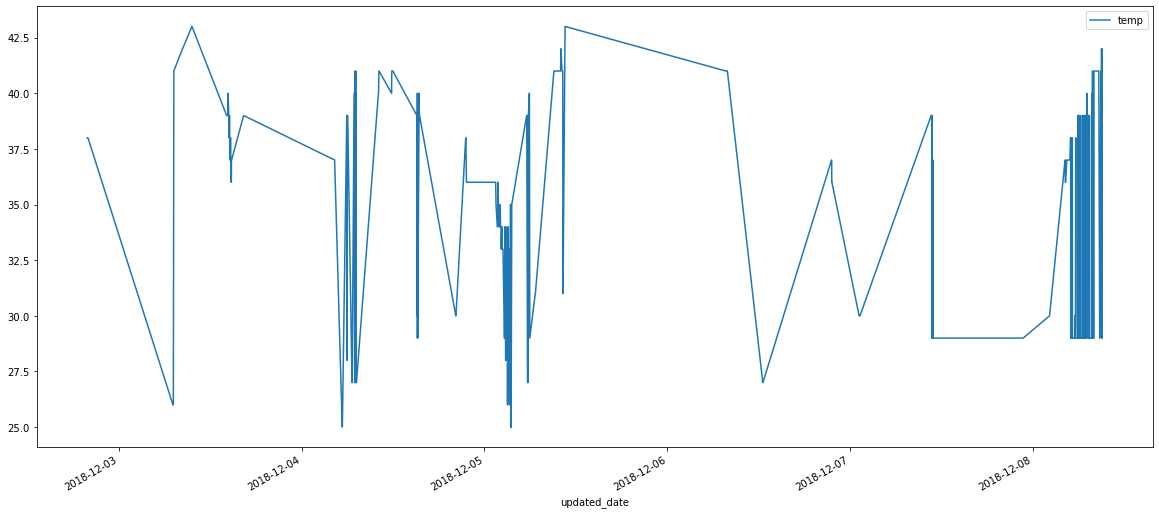

In [207]:
winter_df.plot('updated_date', 'temp', figsize=(20,9))

In [211]:
# in_count = 0
# out_count = 0
# def out_in_counter(value):
#     if value == 'In':
#         in_count = in_count + 1
#     else:
#         out_count = out_count + 1

winter_df.describe(include='all', datetime_is_numeric=True)
#about 60.42% readings are from out

,season,temp,out/in,updated_date
count,374,374.000000,374,374
unique,1,NaN,2,NaN
top,Winter,NaN,Out,NaN
freq,374,NaN,226,NaN
mean,NaN,34.197861,NaN,2018-12-06 06:32:41.871656704
min,NaN,25.000000,NaN,2018-12-02 19:50:00
25%,NaN,29.000000,NaN,2018-12-05 00:20:15
50%,NaN,34.500000,NaN,2018-12-05 10:06:30
75%,NaN,39.000000,NaN,2018-12-08 05:19:15
max,NaN,43.000000,NaN,2018-12-08 09:05:00


In [212]:
monsoon_df.describe(include='all', datetime_is_numeric=True)
#about 68.32% readings are from out

,season,temp,out/in,updated_date
count,9025,9025.000000,9025,9025
unique,1,NaN,2,NaN
top,Monsoon,NaN,Out,NaN
freq,9025,NaN,6166,NaN
mean,NaN,35.985374,NaN,2018-09-16 05:52:29.896951552
min,NaN,24.000000,NaN,2018-07-28 07:08:00
25%,NaN,30.000000,NaN,2018-09-10 15:08:00
50%,NaN,33.000000,NaN,2018-09-17 12:59:00
75%,NaN,43.000000,NaN,2018-09-26 00:57:00
max,NaN,51.000000,NaN,2018-09-30 22:59:00


In [214]:
autumn_df.describe()
#about 76.88% readings are from out

,temp
count,13676.000000
mean,39.549357
std,5.524244
min,22.000000
25%,35.000000
50%,40.000000
75%,44.000000
max,50.000000


<AxesSubplot:>

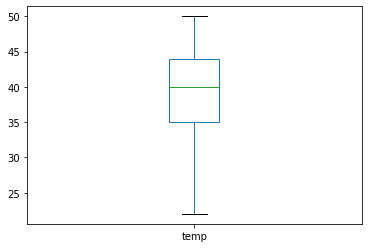

In [215]:
autumn_df.plot(kind='box')